
Expense Management System
1. Log Expense
2. Analyze Expenses
3. Plot Expense Trends
4. Generate Report
5. Set Budget
6. Check Budget
7. Backup Data
8. Restore Data
9. Exit

Total expenses for each member for the month:
Name
ABC    100.0
BDE    500.0
Name: Amount, dtype: float64

Breakdown of expenses by category:
Category
groceries    100.0
utilities    500.0
Name: Amount, dtype: float64


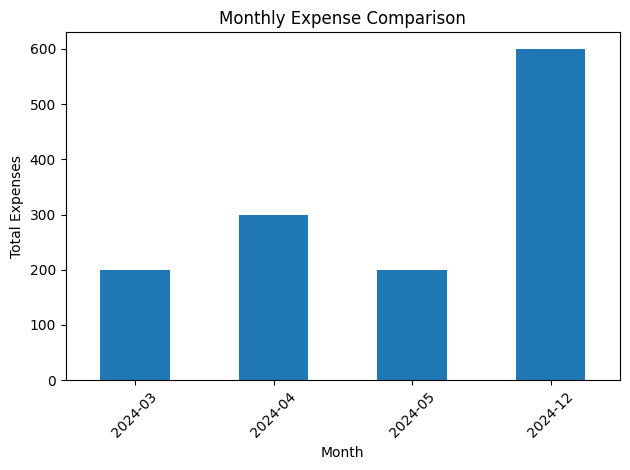


Expense Management System
1. Log Expense
2. Analyze Expenses
3. Plot Expense Trends
4. Generate Report
5. Set Budget
6. Check Budget
7. Backup Data
8. Restore Data
9. Exit


In [2]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import shutil

def log_expense():
    try:
        with open('expenses.csv', mode='a+', newline='') as file:
            writer = csv.writer(file)
            file.seek(0)
            if file.read(1) == '':
                writer.writerow(['Name', 'Date', 'Description', 'Amount', 'Category'])
        
        name = input("Enter your name: ")
        date = input("Enter the date (YYYY-MM-DD): ")
        description = input("Enter a description of the expense: ")
        amount = float(input("Enter the amount: "))
        category = input("Enter the category (e.g., groceries, utilities, entertainment): ")
        
        with open('expenses.csv', mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([name, date, description, amount, category])
        print("Expense added successfully.")
    
    except Exception as e:
        print(f"An error occurred: {e}")

def analyze_expenses():
    try:
        df = pd.read_csv('expenses.csv')
        
        total_expenses = df.groupby('Name')['Amount'].sum()
        total_household_expense = df['Amount'].sum()
        unique_days = df['Date'].nunique()
        avg_daily_expense = total_household_expense / unique_days
        
        print("\nTotal expenses for each member:")
        print(total_expenses)
        print(f"\nAverage daily expense for the household: {avg_daily_expense:.2f}")
    
    except FileNotFoundError:
        print("No expense data found. Please log some expenses first.")
    except Exception as e:
        print(f"An error occurred: {e}")

def plot_expense_trends():
    try:
        df = pd.read_csv('expenses.csv')
        df['Date'] = pd.to_datetime(df['Date'])
        
        last_month = df['Date'].max() - pd.DateOffset(days=30)
        df_last_month = df[df['Date'] >= last_month]
        
        daily_expenses = df_last_month.groupby('Date')['Amount'].sum().cumsum()
        
        plt.plot(daily_expenses.index, daily_expenses.values)
        plt.title('Expense Trends Over the Last Month')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Expenses')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    except FileNotFoundError:
        print("No expense data found. Please log some expenses first.")
    except Exception as e:
        print(f"An error occurred: {e}")

def generate_report():
    try:
        df = pd.read_csv('expenses.csv')
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.strftime('%Y-%m')
        
        current_month = df['Month'].max()
        df_month = df[df['Month'] == current_month]
        
        total_expenses = df_month.groupby('Name')['Amount'].sum()
        print("\nTotal expenses for each member for the month:")
        print(total_expenses)
        
        category_expenses = df_month.groupby('Category')['Amount'].sum()
        print("\nBreakdown of expenses by category:")
        print(category_expenses)
        
        monthly_comparison = df.groupby('Month')['Amount'].sum()
        monthly_comparison.plot(kind='bar')
        plt.title('Monthly Expense Comparison')
        plt.xlabel('Month')
        plt.ylabel('Total Expenses')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    except FileNotFoundError:
        print("No expense data found. Please log some expenses first.")
    except Exception as e:
        print(f"An error occurred: {e}")

def set_budget():
    try:
        budget_file = 'budget.csv'
        category = input("Enter the category: ")
        monthly_budget = float(input(f"Enter the monthly budget for {category}: "))
        
        with open(budget_file, mode='a+', newline='') as file:
            writer = csv.writer(file)
            file.seek(0)
            if file.read(1) == '':
                writer.writerow(['Category', 'Monthly Budget'])
            
            writer.writerow([category, monthly_budget])
        print("Budget set successfully.")
    
    except Exception as e:
        print(f"An error occurred: {e}")

def check_budget():
    try:
        df = pd.read_csv('expenses.csv')
        df_budget = pd.read_csv('budget.csv')
        
        current_month = pd.to_datetime(df['Date']).dt.strftime('%Y-%m').max()
        df_month = df[pd.to_datetime(df['Date']).dt.strftime('%Y-%m') == current_month]
        
        category_expenses = df_month.groupby('Category')['Amount'].sum()
        for index, row in df_budget.iterrows():
            category = row['Category']
            monthly_budget = row['Monthly Budget']
            spent = category_expenses.get(category, 0)
            remaining = monthly_budget - spent
            
            print(f"\nCategory: {category}")
            print(f"Budget: {monthly_budget}, Spent: {spent}, Remaining: {remaining}")
            
            if remaining < 0:
                print(f"Warning! You have exceeded the budget for {category}.")
    
    except FileNotFoundError:
        print("Budget or expense data not found. Please log some expenses or set a budget first.")
    except Exception as e:
        print(f"An error occurred: {e}")

def backup_data():
    try:
        if os.path.exists('expenses.csv'):
            backup_location = input("Enter the backup location (with filename): ")
            shutil.copy('expenses.csv', backup_location)
            print(f"Data backed up to {backup_location}")
        else:
            print("No data to backup.")
    except Exception as e:
        print(f"An error occurred: {e}")

def restore_data():
    try:
        backup_file = input("Enter the path of the backup file to restore: ")
        if os.path.exists(backup_file):
            shutil.copy(backup_file, 'expenses.csv')
            print(f"Data restored from {backup_file}")
        else:
            print("Backup file not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

while True:
    print("\nExpense Management System")
    print("1. Log Expense")
    print("2. Analyze Expenses")
    print("3. Plot Expense Trends")
    print("4. Generate Report")
    print("5. Set Budget")
    print("6. Check Budget")
    print("7. Backup Data")
    print("8. Restore Data")
    print("9. Exit")
    
    choice = input("Enter your choice: ")
    
    menu_options = {
        '1': log_expense,
        '2': analyze_expenses,
        '3': plot_expense_trends,
        '4': generate_report,
        '5': set_budget,
        '6': check_budget,
        '7': backup_data,
        '8': restore_data
    }
    
    if choice == '9':
        break  
    
    action = menu_options.get(choice)
    if action:
        action()
    else:
        print("Invalid choice. Please try again.")
